# Yada Deconvolution

---



- Run the following cells for deconvolution using Yada.

## 1 - Import Prerequisites.

In [ ]:
#On Colab.
!pip install -q tslearn gseapy similaritymeasures
!git clone https://github.com/zurkin1/Yada.git
!mv Yada/* .

In [ ]:
%load_ext autoreload
%autoreload 2

from IPython.display import FileLink, FileLinks
import pandas as pd
from yada import *

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10000)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2 - Configure Input Files.

Example input files are in the ./data/ folder.


In [ ]:
#This is the mixture file in the format: columns: mix1, mix2, ..., rows: gene names.
mix = './data/Challenge/input107019/mix.csv'

#Reference matrix name. Should be normalized as the mix data.
pure = './data/Challenge/input107019/pure.csv'

#True cell type proportions file.
labels = './data/Challenge/input107019/labels.csv'

## 3 - Run Deconvolution.

In [ ]:
result = run_dtw_deconv(mix, pure) #pxcell(mix)
result

#Download Result.
#FileLink('data/results.csv')
#from google.colab import files
#files.download('data/results.csv') 

Deconvolution, num_cells: 14, num_mixes: 20
 100%

,naive.B.cells,endothelial.cells,fibroblasts,memory.B.cells,memory.CD8.T.cells,monocytes,naive.CD4.T.cells,naive.CD8.T.cells,neutrophils,regulatory.T.cells,NK.cells,memory.CD4.T.cells,myeloid.dendritic.cells,macrophages
0,0.047428,0.103198,0.109227,0.069993,0.034403,0.163292,0.045717,0.043423,0.127802,0.035849,0.014623,0.011822,0.092451,0.079035
1,0.044009,0.125430,0.120202,0.055770,0.039191,0.163954,0.054358,0.041517,0.010473,0.021440,0.095818,0.027999,0.084383,0.077888
2,0.045150,0.067923,0.108889,0.072186,0.238655,0.077587,0.095876,0.055748,0.078837,0.032185,0.060204,0.054975,0.042509,0.043781
3,0.075205,0.050708,0.088327,0.052277,0.132853,0.126553,0.064824,0.053939,0.088099,0.040241,0.115630,0.027818,0.049790,0.057198
4,0.015017,0.112653,0.031311,0.006943,0.127873,0.136332,0.035335,0.081886,0.004608,0.031642,0.314304,0.023619,0.016554,0.095192
5,0.069287,0.056405,0.122461,0.070111,0.181797,0.096232,0.102534,0.042327,0.021674,0.047294,0.032668,0.040043,0.080366,0.046087
6,0.016384,0.074758,0.069720,0.008010,0.102967,0.167616,0.029027,0.067191,0.032879,0.030089,0.238404,0.017204,0.018145,0.083018
7,0.087763,0.026355,0.112124,0.101096,0.230510,0.047966,0.146408,0.024493,0.040309,0.049495,0.011630,0.050720,0.052175,0.025604
8,0.041863,0.053754,0.094148,0.083179,0.267191,0.038083,0.114315,0.059424,0.020811,0.039240,0.042383,0.037427,0.052718,0.016167
9,0.016609,0.082543,0.181226,0.018094,0.109805,0.167514,0.069545,0.047162,0.048298,0.012383,0.013142,0.031145,0.126827,0.062866


## 4 - Evaluate Results.

In case true proportions are available.

In [ ]:
calc_corr(labels, result)

naive.B.cells, 0.7155966075486059, SpearmanrResult(correlation=0.5684210526315789, pvalue=0.008922760369500673)
memory.B.cells, 0.8199609169791711, SpearmanrResult(correlation=0.7443609022556391, pvalue=0.00016739569998519392)
naive.CD4.T.cells, 0.44723490818410216, SpearmanrResult(correlation=0.4541353383458646, pvalue=0.04427910416289474)
naive.CD8.T.cells, 0.20992014504888243, SpearmanrResult(correlation=0.21804511278195485, pvalue=0.35573636611773685)
memory.CD8.T.cells, 0.11778612687020364, SpearmanrResult(correlation=-0.04060150375939849, pvalue=0.8650468790077722)
regulatory.T.cells, -0.04335375341063228, SpearmanrResult(correlation=0.0015037593984962405, pvalue=0.9949797739432688)
monocytes, 0.8032391904867298, SpearmanrResult(correlation=0.8616541353383457, pvalue=1.0555245332264338e-06)
NK.cells, 0.9844896585087224, SpearmanrResult(correlation=0.9894736842105262, pvalue=1.450570213696417e-16)
myeloid.dendritic.cells, 0.9166845048630652, SpearmanrResult(correlation=0.924812030

## 5 - Benchmark.

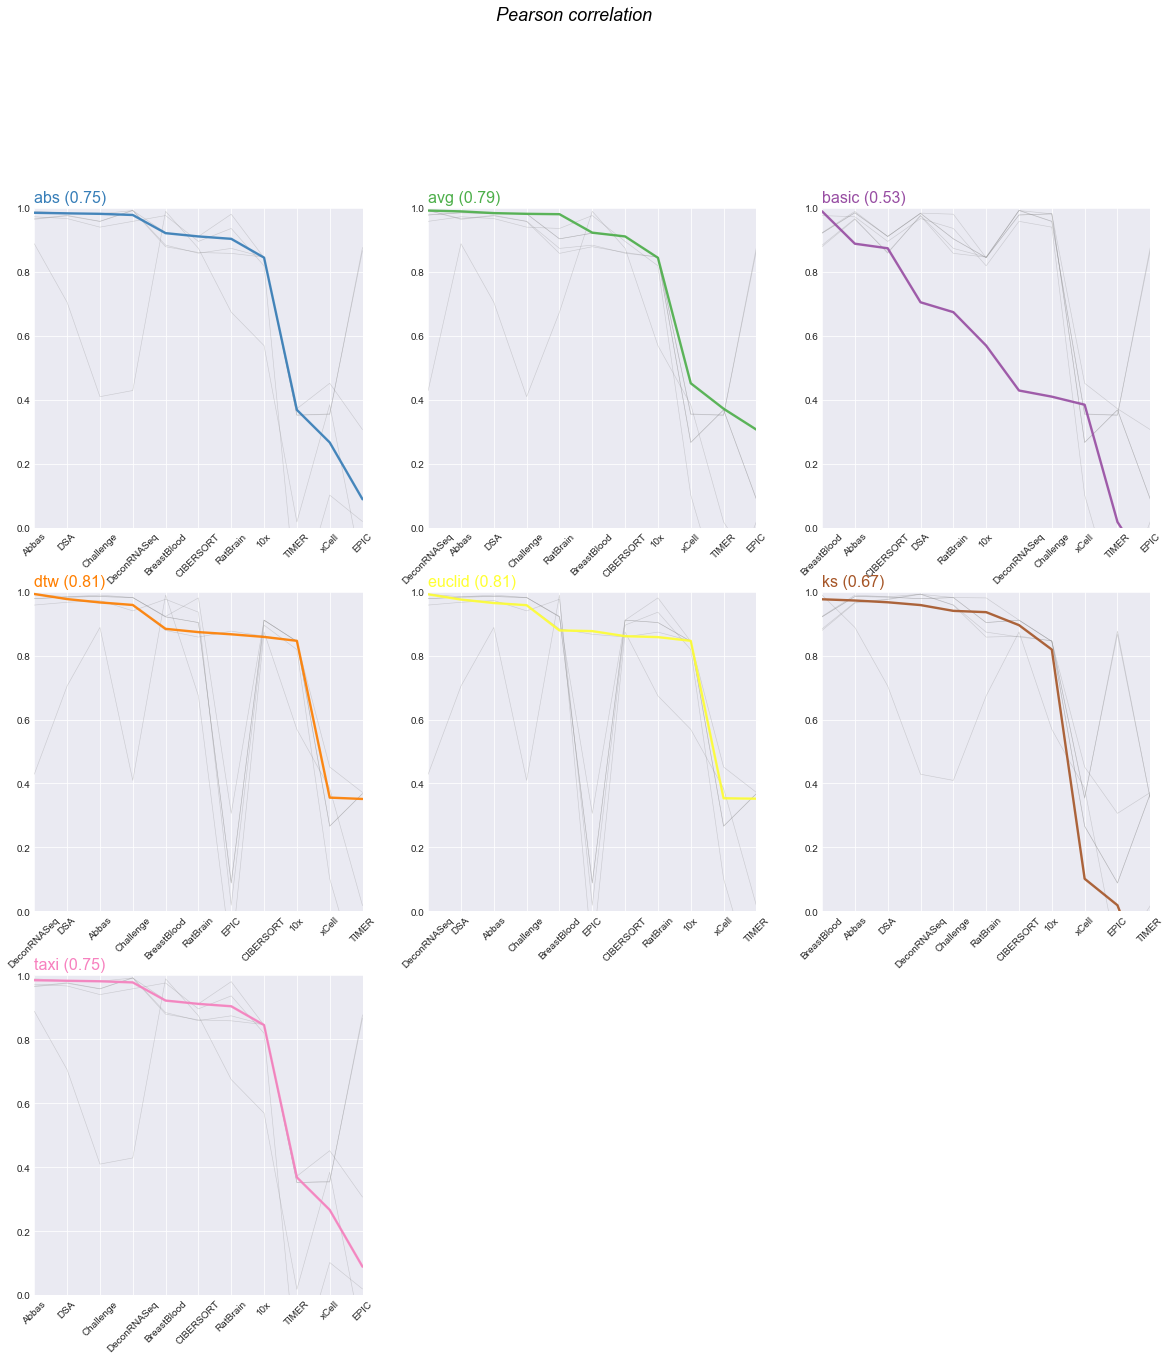

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.rcParams["figure.figsize"] = [20,20]

# Make a data frame
#df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21), 'y4': np.random.randn(10)+range(6,16), 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 'y6': np.random.randn(10)+range(2,12), 'y7': np.random.randn(10)+range(5,15), 'y8': np.random.randn(10)+range(4,14), 'y9': np.random.randn(10)+range(4,14) })
df = pd.read_csv('./data/result.csv', index_col=0)
df.columns = ['metric', 'dataset', 'platform', 'celltype', 'pearson', 'spearman', 'p']
df = df.drop(['pearson', 'p'], axis=1)
df = df.groupby(['metric', 'dataset']).mean().reset_index().pivot(index='dataset', columns='metric', values='spearman').reset_index()

# Initialize the figure style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in df.drop('dataset', axis=1):
    num+=1
    
    df = df.sort_values(column, ascending=False)
    # Find the right spot on the plot
    plt.subplot(3,3, num)
 
    # plot every group, but discrete
    for v in df.drop('dataset', axis=1):
        plt.plot(df['dataset'], df[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
 
    # Plot the lineplot
    plt.plot(df['dataset'], df[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)
 
    # Same limits for every chart
    plt.xlim(0,10)
    plt.ylim(0,1)
 
    # Not ticks everywhere
    if num in range(7) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
 
    # Add title
    plt.title(f'{column} ({np.round(df[column].mean(), 2)})', loc='left', fontsize=16, fontweight=0, color=palette(num) )
    plt.xticks(rotation=45)

# general title
plt.suptitle("Spearman correlation of different metrics over ten datasets", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
 
# Axis titles
#plt.text(0.5, 0.02, 'Time', ha='center', va='center')
#plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')

# Show the graph
plt.show()

In [ ]:
data = pd.read_csv('./data/result.csv', index_col=0)
data.columns = ['metric', 'dataset', 'platform', 'celltype', 'pearson', 'spearman', 'p']
data = data.drop(['pearson', 'p'], axis=1)
data = data.groupby(['metric', 'dataset']).mean().reset_index().pivot(index='dataset', columns='metric', values='spearman').reset_index()

In [3]:
!pip install rdata
!git clone https://github.com/jokergoo/CePa.git

Cloning into 'CePa'...
remote: Enumerating objects: 238, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 238 (delta 12), reused 14 (delta 3), pack-reused 196
Receiving objects: 100% (238/238), 3.17 MiB | 30.31 MiB/s, done.
Resolving deltas: 100% (98/98), done.


In [69]:
import rdata

parsed = rdata.parser.parse_file("./CePa/data/PID.db.rda")
converted = rdata.conversion.convert(parsed)

kegg = converted['PID.db']['KEGG']
for k in kegg.keys():
  print(k, type(kegg[k]))

path = 'hsa05221'
inter_id = kegg['pathList'][path][0]
print(inter_id)

interaction = kegg['interactionList'].loc[kegg['interactionList']['interaction.id'] == inter_id]
interaction

mapping = kegg['mapping']
print(mapping.loc[mapping['node.id'] == '739604'])
#print(mapping.loc[mapping['node.id'] == '739577'])
nn = kegg['node.name']
nt = kegg['node.type']
ind = nn.index('RPS6KB2')
nt[ind]

np.save('pid.dict', converted)

/usr/local/lib/python3.7/dist-packages/rdata/conversion/_conversion.py:674: UserWarning: Missing constructor for R class "pathway.catalogue". The underlying R object is returned instead.
  stacklevel=1,
